
# Baby Names 1
##### This project is based on the US Baby Names 1880-2010 section in chapter 2 of Python for Data Analysis by Wes McKinney.  
Data for the project can be found here - https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-level-data 
1/28/17


In [8]:
import pandas as pd
names_1880 = pd.read_csv('data/yob1880.txt', names = ['name', 'sex', 'births'])
names_1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [2]:
names_1880.groupby('sex')['births'].sum()

sex
F     90992
M    110490
Name: births, dtype: int64

In [9]:
#from page 30
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
names_1880 = pd.read_csv('data/yob1880.txt', names = ['name', 'sex', 'births'])

years = range(1880, 2016)

pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'data/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    
    frame['year'] = year
    pieces.append(frame)

#concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index = True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


#### I begin to make some changes here from the text.  First I am only interested in my name.  Also, I find that some of the text has been deprecated since the book was written in 2011

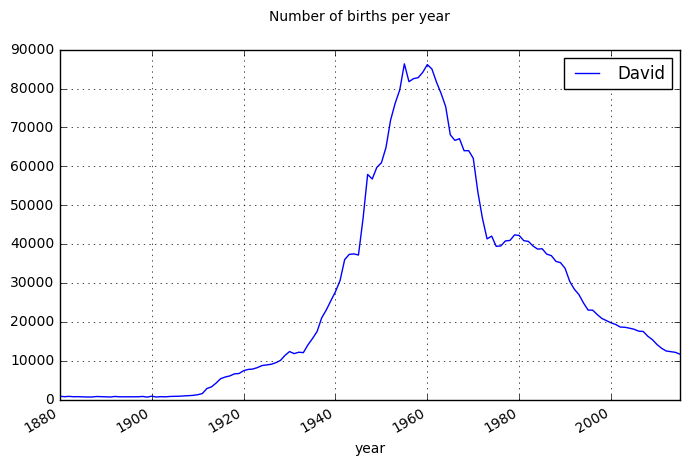

In [10]:
#get top 1000
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
                 #book has sort_index, got a deprecation warning to change to sort_values
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']


# Get total births
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)
                                        #book has rows, cols rather than index, columns - updated
#total_births.info()

#just my name
subset = total_births[['David']]
subset.plot(subplots=True, figsize=(8,5), grid = True, title="Number of births per year")
plt.show()

##### Here I want to see what proportion of names are my name throughout the years

In [5]:
#getting a DataFrame that is all births in a year summed
all_births = pd.pivot_table(names, index = ['year'],aggfunc=np.sum)
all_births.head()

,births
year,
1880,201482
1881,192696
1882,221534
1883,216945
1884,243463


In [6]:
#merging all births to the subset of births that are only my name, then creating proportion of births that are my name
new_frame = pd.concat([all_births, subset], axis = 1)
new_frame['prop'] = new_frame['David'] / new_frame['births']
new_frame.head()

,births,David,prop
year,,,
1880,201482,869.0,0.004313
1881,192696,750.0,0.003892
1882,221534,838.0,0.003783
1883,216945,740.0,0.003411
1884,243463,761.0,0.003126


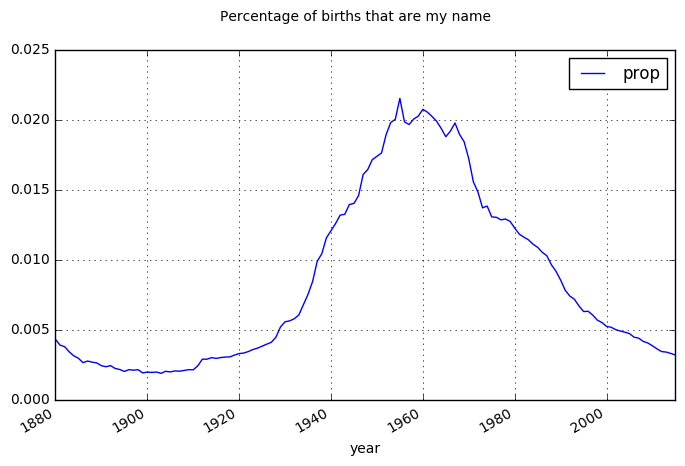

In [7]:
#now to plot prop
dave_prop = new_frame[['prop']]
dave_prop.plot(subplots=True, figsize=(8,5), grid = True, title="Percentage of births that are my name")
plt.show()              